<a href="https://colab.research.google.com/github/cosh14/Project/blob/master/myIsingHex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 169.33393692970276 seconds ---
--- 334.09700989723206 seconds ---
--- 499.47909903526306 seconds ---
--- 658.0579619407654 seconds ---
--- 818.6411330699921 seconds ---
--- 975.8670074939728 seconds ---


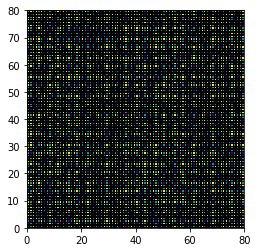

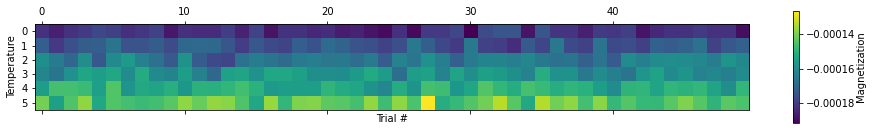

[-0.00018265 -0.00017409 -0.00016523 -0.00015856 -0.00015166 -0.00014318]


<function matplotlib.pyplot.show>

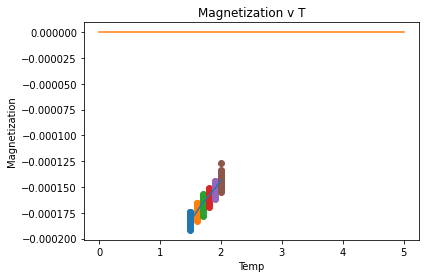

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import itertools
import time
start_time = time.time()


def GenerateHexLattice(N):
    config = (2*rd(0,2,(N,N)))-1
    #config = (2*rd(0,1,(N,N)))-1
    k = 0
    while k <N:
        i = 0
        j = 2
        while j < N:
            config [j][k] = 0
            config [j+1][k] = 0 
            j = j + 4
        while i < N:    
            config [i][k+1] = 0
            config [i+1][k+1] = 0
            i = i + 4
        k = k+2
    return config            

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]
    if s == 0:
        return 0   
    elif Lattice [(a+1)%N,b] == 0:
        if Lattice [(a-1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    else:
        if Lattice [(a+1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    return  s

def graph (df):
    plt.pcolormesh(df, edgecolors='k', linewidth=0.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    return 0

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag

myTval = np.linspace(1.5,2,6)
 
N=80
N_loops = 50
config = GenerateHexLattice(N)
sites = np.count_nonzero(config)
bank = np.zeros((len(myTval),N_loops))
graph(config)



for i in range (len(myTval)):
    tempo_mag = np.zeros(N_loops, dtype=float)
    config = GenerateHexLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo_mag [m] = MagCalc(config)/(sites*sites)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo_mag


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.plot ([0,5],[0,0])
plt.show


--- 33.82964563369751 seconds ---
--- 68.21880960464478 seconds ---
--- 105.43427181243896 seconds ---
--- 138.5039472579956 seconds ---
--- 171.40824222564697 seconds ---
--- 203.91834568977356 seconds ---
--- 236.25108647346497 seconds ---
--- 268.19424057006836 seconds ---
--- 300.2818510532379 seconds ---
--- 332.1917703151703 seconds ---
--- 363.803582906723 seconds ---
--- 396.5563747882843 seconds ---
--- 429.0278146266937 seconds ---
--- 459.9221143722534 seconds ---
--- 490.99388551712036 seconds ---
--- 521.7026960849762 seconds ---
--- 552.5518815517426 seconds ---
--- 583.2733435630798 seconds ---
--- 614.2407810688019 seconds ---
--- 644.9349932670593 seconds ---
--- 675.5594863891602 seconds ---
--- 706.3215727806091 seconds ---
--- 738.4654803276062 seconds ---
--- 768.8740427494049 seconds ---
--- 799.3645374774933 seconds ---


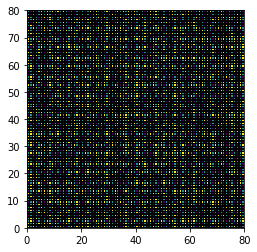

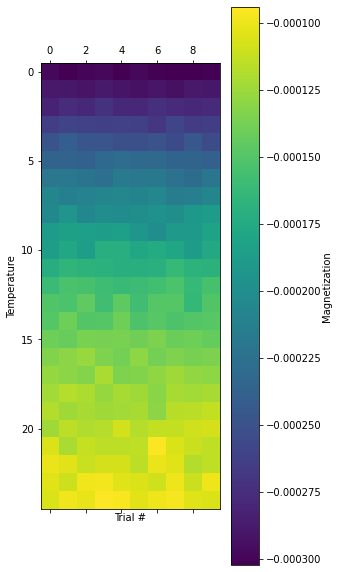

[-0.00030031 -0.00028996 -0.0002775  -0.00026311 -0.00024885 -0.00023385
 -0.00022139 -0.00020914 -0.00019789 -0.00018816 -0.00017881 -0.00016869
 -0.00015766 -0.00015229 -0.00014785 -0.00013904 -0.00013359 -0.00012881
 -0.00012285 -0.00012074 -0.00011426 -0.0001109  -0.0001082  -0.000104
 -0.00010057]


<function matplotlib.pyplot.show>

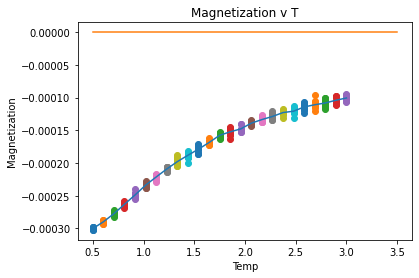

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import itertools
import time
start_time = time.time()


def GenerateHexLattice(N):
    config = (2*rd(0,2,(N,N)))-1
    #config = (2*rd(0,1,(N,N)))-1
    k = 0
    while k <N:
        i = 0
        j = 2
        while j < N:
            config [j][k] = 0
            config [j+1][k] = 0 
            j = j + 4
        while i < N:    
            config [i][k+1] = 0
            config [i+1][k+1] = 0
            i = i + 4
        k = k+2
    return config            

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]
    if s == 0:
        return 0   
    elif Lattice [(a+1)%N,b] == 0:
        if Lattice [(a-1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    else:
        if Lattice [(a+1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    return  s

def graph (df):
    plt.pcolormesh(df, edgecolors='k', linewidth=0.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    return 0

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag

myTval = np.linspace(0.5,3,25)
 
N=80
N_loops = 10
config = GenerateHexLattice(N)
sites = np.count_nonzero(config)
bank = np.zeros((len(myTval),N_loops))
graph(config)



for i in range (len(myTval)):
    tempo_mag = np.zeros(N_loops, dtype=float)
    config = GenerateHexLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo_mag [m] = MagCalc(config)/(sites*sites)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo_mag


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.plot ([0.5,3.5],[0,0])
plt.show


--- 34.139713525772095 seconds ---
--- 70.19118165969849 seconds ---
--- 104.60562777519226 seconds ---
--- 139.17198157310486 seconds ---
--- 173.48641681671143 seconds ---
--- 207.20981884002686 seconds ---
--- 241.31929564476013 seconds ---
--- 275.45692777633667 seconds ---
--- 309.11768913269043 seconds ---
--- 342.4785387516022 seconds ---
--- 376.78967809677124 seconds ---
--- 410.83585381507874 seconds ---
--- 443.4877381324768 seconds ---
--- 476.5903596878052 seconds ---
--- 509.22962069511414 seconds ---
--- 541.2612147331238 seconds ---
--- 573.6050426959991 seconds ---
--- 606.3848121166229 seconds ---
--- 638.460921049118 seconds ---
--- 670.5312123298645 seconds ---
--- 703.470419883728 seconds ---
--- 735.4016664028168 seconds ---
--- 767.0694477558136 seconds ---
--- 798.8612661361694 seconds ---
--- 830.8917491436005 seconds ---
--- 862.4627695083618 seconds ---
--- 894.3132181167603 seconds ---
--- 926.4270665645599 seconds ---
--- 958.0925087928772 seconds ---
--- 9

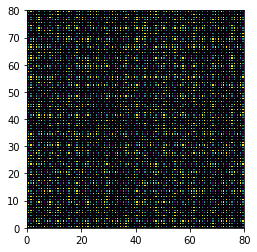

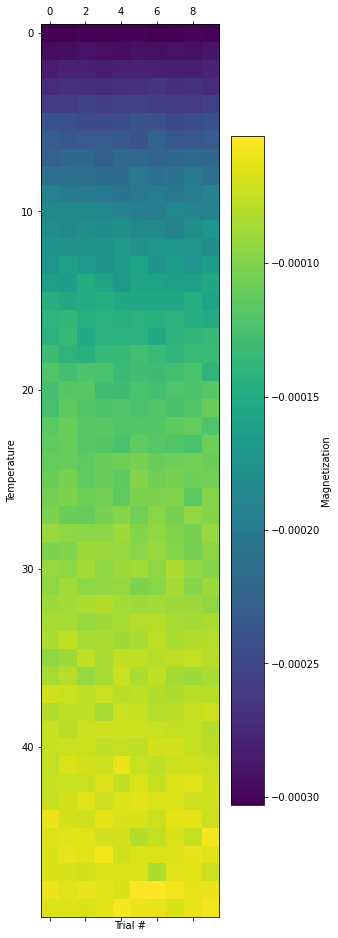

[-3.01523437e-04 -2.92246094e-04 -2.80664062e-04 -2.68320313e-04
 -2.56093750e-04 -2.42246094e-04 -2.31621094e-04 -2.19863281e-04
 -2.09082031e-04 -1.98925781e-04 -1.89121094e-04 -1.81113281e-04
 -1.73242188e-04 -1.66777344e-04 -1.58417969e-04 -1.51347656e-04
 -1.43300781e-04 -1.41660156e-04 -1.35097656e-04 -1.27910156e-04
 -1.23457031e-04 -1.20019531e-04 -1.16289062e-04 -1.16484375e-04
 -1.08789063e-04 -1.07070313e-04 -1.04765625e-04 -1.01738281e-04
 -9.50390625e-05 -9.56250000e-05 -9.09765625e-05 -9.32226562e-05
 -8.73632812e-05 -8.47851562e-05 -8.19140625e-05 -8.06640625e-05
 -8.30078125e-05 -7.67578125e-05 -7.68945313e-05 -7.44531250e-05
 -7.36718750e-05 -7.05273437e-05 -7.03320313e-05 -6.84765625e-05
 -6.63085938e-05 -6.86718750e-05 -6.46093750e-05 -6.85351562e-05
 -5.96875000e-05 -6.23242187e-05]


<function matplotlib.pyplot.show>

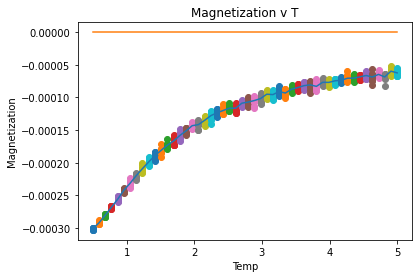

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import itertools
import time
start_time = time.time()


def GenerateHexLattice(N):
    config = (2*rd(0,2,(N,N)))-1
    #config = (2*rd(0,1,(N,N)))-1
    k = 0
    while k <N:
        i = 0
        j = 2
        while j < N:
            config [j][k] = 0
            config [j+1][k] = 0 
            j = j + 4
        while i < N:    
            config [i][k+1] = 0
            config [i+1][k+1] = 0
            i = i + 4
        k = k+2
    return config            

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]
    if s == 0:
        return 0   
    elif Lattice [(a+1)%N,b] == 0:
        if Lattice [(a-1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    else:
        if Lattice [(a+1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    return  s

def graph (df):
    plt.pcolormesh(df, edgecolors='k', linewidth=0.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    return 0

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag

myTval = np.linspace(0.5,5,50)
 
N=80
N_loops = 10
config = GenerateHexLattice(N)
sites = np.count_nonzero(config)
bank = np.zeros((len(myTval),N_loops))
graph(config)



for i in range (len(myTval)):
    tempo_mag = np.zeros(N_loops, dtype=float)
    #config = GenerateHexLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo_mag [m] = MagCalc(config)/(sites*sites)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo_mag


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.plot ([0.5,5],[0,0])
plt.show


--- 32.57989263534546 seconds ---
--- 65.94313740730286 seconds ---
--- 98.07651662826538 seconds ---
--- 129.92343831062317 seconds ---
--- 162.06322240829468 seconds ---
--- 194.7608127593994 seconds ---


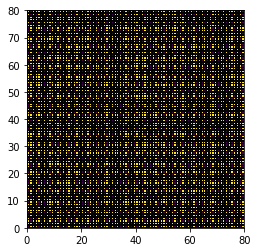

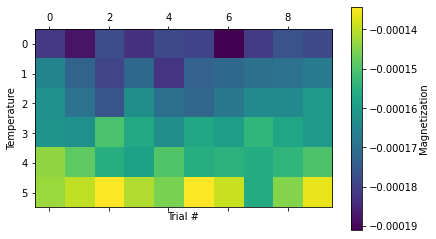

[-0.00018145 -0.00017238 -0.00016695 -0.00015809 -0.0001525  -0.00014133]


<function matplotlib.pyplot.show>

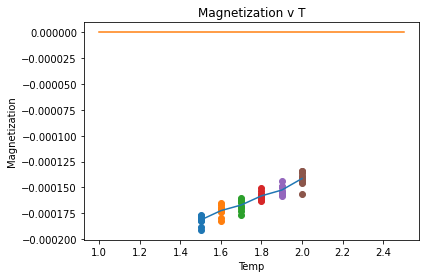

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import itertools
import time
start_time = time.time()


def GenerateHexLattice(N):
    #config = (2*rd(0,2,(N,N)))-1
    config = (2*rd(0,1,(N,N)))-1
    k = 0
    while k <N:
        i = 0
        j = 2
        while j < N:
            config [j][k] = 0
            config [j+1][k] = 0 
            j = j + 4
        while i < N:    
            config [i][k+1] = 0
            config [i+1][k+1] = 0
            i = i + 4
        k = k+2
    return config            

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]
    if s == 0:
        return 0   
    elif Lattice [(a+1)%N,b] == 0:
        if Lattice [(a-1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    else:
        if Lattice [(a+1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    return  s

def graph (df):
    plt.pcolormesh(df, edgecolors='k', linewidth=0.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    return 0

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag

myTval = np.linspace(1.5,2,6)
 
N=80
N_loops = 10
config = GenerateHexLattice(N)
sites = np.count_nonzero(config)
bank = np.zeros((len(myTval),N_loops))
graph(config)



for i in range (len(myTval)):
    tempo_mag = np.zeros(N_loops, dtype=float)
    #config = GenerateHexLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo_mag [m] = MagCalc(config)/(sites*sites)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo_mag


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.plot ([1,2.5],[0,0])
plt.show


--- 33.69976019859314 seconds ---
--- 66.08409690856934 seconds ---
--- 97.64714789390564 seconds ---
--- 129.0960988998413 seconds ---
--- 160.8124384880066 seconds ---
--- 192.3237771987915 seconds ---


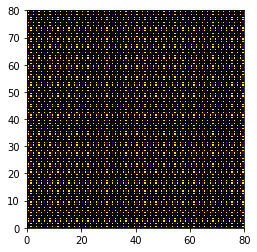

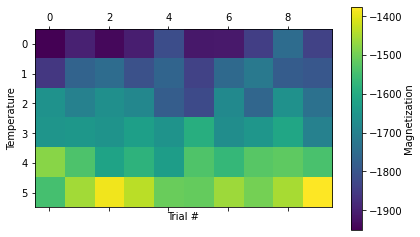

[-1875.2 -1782.8 -1714.  -1644.8 -1552.4 -1463. ]


<function matplotlib.pyplot.show>

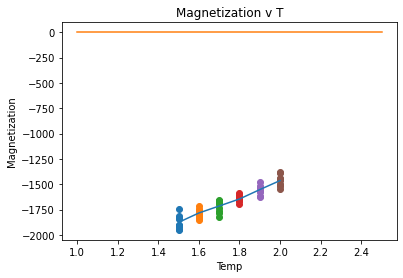

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import itertools
import time
start_time = time.time()


def GenerateHexLattice(N):
    #config = (2*rd(0,2,(N,N)))-1
    config = (2*rd(0,1,(N,N)))-1
    k = 0
    while k <N:
        i = 0
        j = 2
        while j < N:
            config [j][k] = 0
            config [j+1][k] = 0 
            j = j + 4
        while i < N:    
            config [i][k+1] = 0
            config [i+1][k+1] = 0
            i = i + 4
        k = k+2
    return config            

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]
    if s == 0:
        return 0   
    elif Lattice [(a+1)%N,b] == 0:
        if Lattice [(a-1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    else:
        if Lattice [(a+1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    return  s

def graph (df):
    plt.pcolormesh(df, edgecolors='k', linewidth=0.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    return 0

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag

myTval = np.linspace(1.5,2,6)
 
N=80
N_loops = 10
config = GenerateHexLattice(N)
sites = np.count_nonzero(config)
bank = np.zeros((len(myTval),N_loops))
graph(config)



for i in range (len(myTval)):
    tempo_mag = np.zeros(N_loops, dtype=float)
    config = GenerateHexLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo_mag [m] = MagCalc(config)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo_mag


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.plot ([1,2.5],[0,0])
plt.show


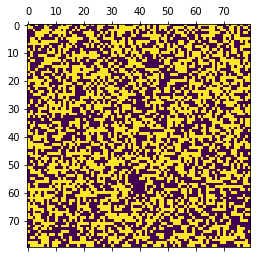

--- 36.297850131988525 seconds ---
--- 73.14794421195984 seconds ---
--- 109.05098104476929 seconds ---
--- 144.58055233955383 seconds ---
--- 181.10669040679932 seconds ---
--- 215.8029546737671 seconds ---


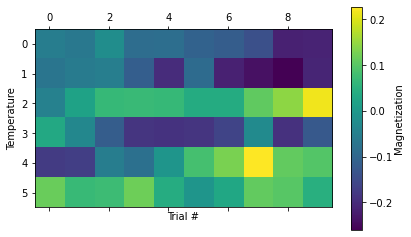

[-0.1101875  -0.15075     0.0730625  -0.1178125   0.0165      0.07065625]


<function matplotlib.pyplot.show>

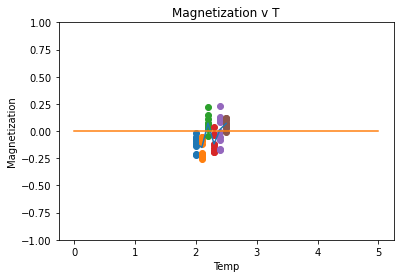

In [7]:
#my ising square
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import time
start_time = time.time()


def GenerateSqLattice(N):
    config = (2*rd(0,2,(N,N)))-1
    #config = (2*rd(0,1,(N,N)))-1
    return config

#print (GenerateSqLattice(3)) 

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]

    if Lattice [(a+1)%N,b] == s:
        intrxE += -1
    else:
        intrxE += 1
    if Lattice [(a-1)%N,b] == s:
        intrxE += -1
    else:
        intrxE += 1
    if Lattice [a,(b+1)%N] == s:
        intrxE += -1
    else:
        intrxE += 1
    if Lattice [a,(b-1)%N] == s:
        intrxE += -1
    else:
        intrxE += 1
    return  intrxE
    

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag



#myTval = [0.1, 0.1, 0.5, 1, 2, 2.22, 2.24, 2.26, 2.28, 2.30, 2.5, 3, 5]
#myTval = [0.1, 1, 2.2, 2.6, 2.8, 3, 5]
myTval = np.linspace(2.0,2.5,6)

N=80
N_loops = 10
config = GenerateSqLattice(N)
bank = np.zeros((len(myTval),N_loops))
plt.matshow(config)
plt.show()


for i in range (len(myTval)):
    tempo = np.zeros(N_loops, dtype=float)
    config = GenerateSqLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo [m] = MagCalc(config)/(N*N)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.ylim(-1,1)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.plot ([0,5],[0,0])
plt.show


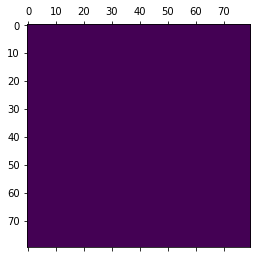

--- 36.59255290031433 seconds ---
--- 73.01375484466553 seconds ---
--- 110.87424969673157 seconds ---
--- 146.98958158493042 seconds ---
--- 182.4275119304657 seconds ---
--- 217.1623272895813 seconds ---


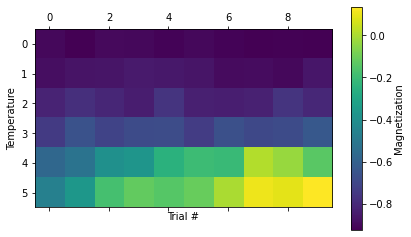

[-0.911375   -0.87175    -0.807      -0.68765625 -0.26421875 -0.10340625]


<function matplotlib.pyplot.show>

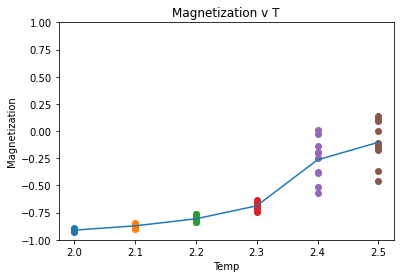

In [8]:
#my ising square
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import time
start_time = time.time()


def GenerateSqLattice(N):
    #config = (2*rd(0,2,(N,N)))-1
    config = (2*rd(0,1,(N,N)))-1
    return config

#print (GenerateSqLattice(3)) 

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]

    if Lattice [(a+1)%N,b] == s:
        intrxE += -1
    else:
        intrxE += 1
    if Lattice [(a-1)%N,b] == s:
        intrxE += -1
    else:
        intrxE += 1
    if Lattice [a,(b+1)%N] == s:
        intrxE += -1
    else:
        intrxE += 1
    if Lattice [a,(b-1)%N] == s:
        intrxE += -1
    else:
        intrxE += 1
    return  intrxE
    

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag



#myTval = [0.1, 0.1, 0.5, 1, 2, 2.22, 2.24, 2.26, 2.28, 2.30, 2.5, 3, 5]
#myTval = [0.1, 1, 2.2, 2.6, 2.8, 3, 5]
myTval = np.linspace(2.0,2.5,6)

N=80
N_loops = 10
config = GenerateSqLattice(N)
bank = np.zeros((len(myTval),N_loops))
plt.matshow(config)
plt.show()


for i in range (len(myTval)):
    tempo = np.zeros(N_loops, dtype=float)
    config = GenerateSqLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo [m] = MagCalc(config)/(N*N)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.ylim(-1,1)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.show


3200
--- 33.400328159332275 seconds ---
--- 65.93580269813538 seconds ---
--- 98.19305300712585 seconds ---
--- 135.22055220603943 seconds ---
--- 168.1150200366974 seconds ---
--- 200.63930296897888 seconds ---


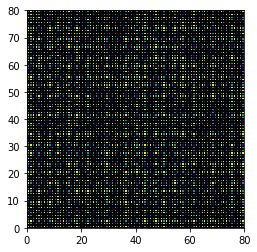

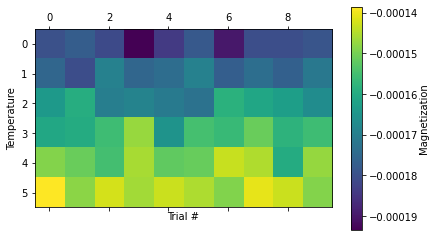

[-0.00018227 -0.00017416 -0.00016537 -0.00015631 -0.00014982 -0.00014436]


<function matplotlib.pyplot.show>

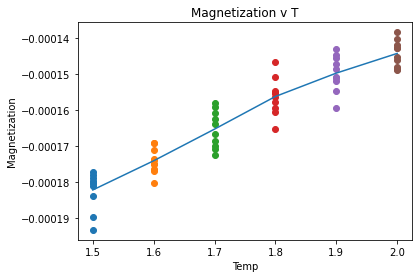

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import itertools
import time
start_time = time.time()


def GenerateHexLattice(N):
    config = (2*rd(0,2,(N,N)))-1
    #config = (2*rd(0,1,(N,N)))-1
    k = 0
    while k <N:
        i = 0
        j = 2
        while j < N:
            config [j][k] = 0
            config [j+1][k] = 0 
            j = j + 4
        while i < N:    
            config [i][k+1] = 0
            config [i+1][k+1] = 0
            i = i + 4
        k = k+2
    return config            

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]
    if s == 0:
        return 0   
    elif Lattice [(a+1)%N,b] == 0:
        if Lattice [(a-1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    else:
        if Lattice [(a+1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    return  s

def graph (df):
    plt.pcolormesh(df, edgecolors='k', linewidth=0.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    return 0

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag

myTval = np.linspace(1.5,2,6)
 
N=80
N_loops = 10
config = GenerateHexLattice(N)
sites = np.count_nonzero(config)
print (sites)
bank = np.zeros((len(myTval),N_loops))
graph(config)



for i in range (len(myTval)):
    tempo_mag = np.zeros(N_loops, dtype=float)
    config = GenerateHexLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo_mag [m] = MagCalc(config)/(sites*sites)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo_mag


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.show


3200
--- 33.26818013191223 seconds ---
--- 66.38654065132141 seconds ---
--- 98.99962401390076 seconds ---
--- 131.977942943573 seconds ---
--- 164.72150945663452 seconds ---
--- 197.3538408279419 seconds ---


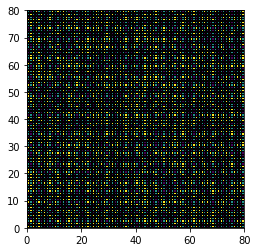

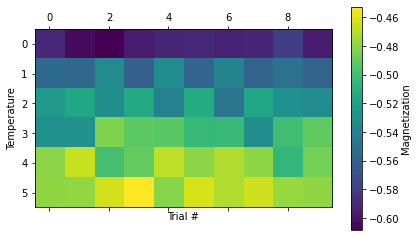

[-0.594     -0.55      -0.5261875 -0.5054375 -0.482     -0.47025  ]


<function matplotlib.pyplot.show>

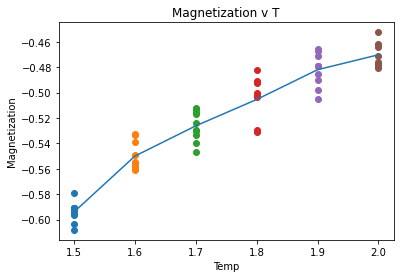

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import itertools
import time
start_time = time.time()


def GenerateHexLattice(N):
    config = (2*rd(0,2,(N,N)))-1
    #config = (2*rd(0,1,(N,N)))-1
    k = 0
    while k <N:
        i = 0
        j = 2
        while j < N:
            config [j][k] = 0
            config [j+1][k] = 0 
            j = j + 4
        while i < N:    
            config [i][k+1] = 0
            config [i+1][k+1] = 0
            i = i + 4
        k = k+2
    return config            

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]
    if s == 0:
        return 0   
    elif Lattice [(a+1)%N,b] == 0:
        if Lattice [(a-1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    else:
        if Lattice [(a+1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    return  s

def graph (df):
    plt.pcolormesh(df, edgecolors='k', linewidth=0.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    return 0

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag

myTval = np.linspace(1.5,2,6)
 
N=80
N_loops = 10
config = GenerateHexLattice(N)
sites = np.count_nonzero(config)
print (sites)
bank = np.zeros((len(myTval),N_loops))
graph(config)



for i in range (len(myTval)):
    tempo_mag = np.zeros(N_loops, dtype=float)
    config = GenerateHexLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo_mag [m] = MagCalc(config)/(sites)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo_mag


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.show


3200
--- 33.40896487236023 seconds ---
--- 65.88431358337402 seconds ---
--- 98.5768814086914 seconds ---
--- 131.0729410648346 seconds ---
--- 163.2498378753662 seconds ---
--- 195.3524730205536 seconds ---
--- 227.46108317375183 seconds ---
--- 260.1619417667389 seconds ---
--- 293.91568899154663 seconds ---
--- 325.6557400226593 seconds ---
--- 357.4382131099701 seconds ---
--- 389.0465500354767 seconds ---


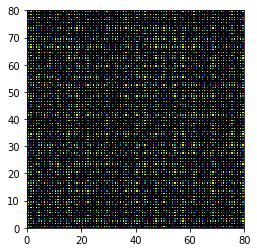

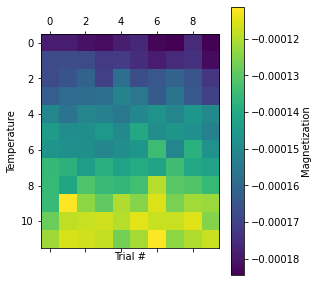

[-0.0001802  -0.00017312 -0.00016529 -0.00015988 -0.00015104 -0.00014705
 -0.00014568 -0.00013951 -0.00013283 -0.00012287 -0.00011887 -0.0001193 ]


<function matplotlib.pyplot.show>

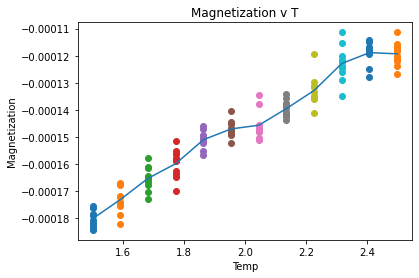

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import itertools
import time
start_time = time.time()


def GenerateHexLattice(N):
    config = (2*rd(0,2,(N,N)))-1
    #config = (2*rd(0,1,(N,N)))-1
    k = 0
    while k <N:
        i = 0
        j = 2
        while j < N:
            config [j][k] = 0
            config [j+1][k] = 0 
            j = j + 4
        while i < N:    
            config [i][k+1] = 0
            config [i+1][k+1] = 0
            i = i + 4
        k = k+2
    return config            

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]
    if s == 0:
        return 0   
    elif Lattice [(a+1)%N,b] == 0:
        if Lattice [(a-1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    else:
        if Lattice [(a+1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    return  s

def graph (df):
    plt.pcolormesh(df, edgecolors='k', linewidth=0.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    return 0

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag

myTval = np.linspace(1.5,2.5,12)
 
N=80
N_loops = 10
config = GenerateHexLattice(N)
sites = np.count_nonzero(config)
print (sites)
bank = np.zeros((len(myTval),N_loops))
graph(config)



for i in range (len(myTval)):
    tempo_mag = np.zeros(N_loops, dtype=float)
    config = GenerateHexLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo_mag [m] = MagCalc(config)/(sites*sites)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo_mag


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.show


3200
--- 33.770695209503174 seconds ---
--- 68.24527430534363 seconds ---
--- 100.99767780303955 seconds ---
--- 134.05689883232117 seconds ---
--- 166.38412737846375 seconds ---
--- 198.7090265750885 seconds ---
--- 230.7638943195343 seconds ---
--- 262.84222531318665 seconds ---
--- 294.7674081325531 seconds ---
--- 327.4046354293823 seconds ---
--- 360.15553522109985 seconds ---
--- 393.75865387916565 seconds ---


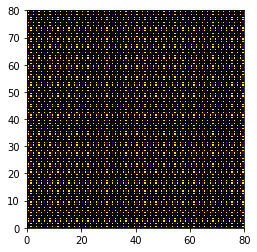

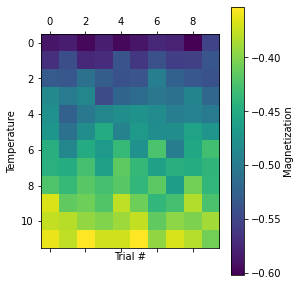

[-0.583625  -0.5540625 -0.52725   -0.507125  -0.4913125 -0.475625
 -0.456125  -0.442     -0.4278125 -0.4065625 -0.3915    -0.373375 ]


<function matplotlib.pyplot.show>

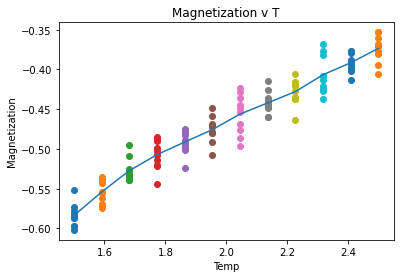

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import itertools
import time
start_time = time.time()


def GenerateHexLattice(N):
    #config = (2*rd(0,2,(N,N)))-1
    config = (2*rd(0,1,(N,N)))-1
    k = 0
    while k <N:
        i = 0
        j = 2
        while j < N:
            config [j][k] = 0
            config [j+1][k] = 0 
            j = j + 4
        while i < N:    
            config [i][k+1] = 0
            config [i+1][k+1] = 0
            i = i + 4
        k = k+2
    return config            

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]
    if s == 0:
        return 0   
    elif Lattice [(a+1)%N,b] == 0:
        if Lattice [(a-1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    else:
        if Lattice [(a+1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    return  s

def graph (df):
    plt.pcolormesh(df, edgecolors='k', linewidth=0.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    return 0

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag

myTval = np.linspace(1.5,2.5,12)
 
N=80
N_loops = 10
config = GenerateHexLattice(N)
sites = np.count_nonzero(config)
print (sites)
bank = np.zeros((len(myTval),N_loops))
graph(config)



for i in range (len(myTval)):
    tempo_mag = np.zeros(N_loops, dtype=float)
    config = GenerateHexLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo_mag [m] = MagCalc(config)/(sites)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo_mag


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.show


3200
--- 82.4554533958435 seconds ---
--- 166.33534860610962 seconds ---
--- 250.88846158981323 seconds ---
--- 333.0465245246887 seconds ---
--- 416.59881925582886 seconds ---
--- 501.56029534339905 seconds ---
--- 587.194118976593 seconds ---
--- 670.6887056827545 seconds ---
--- 755.5801734924316 seconds ---
--- 838.3993771076202 seconds ---
--- 925.0456700325012 seconds ---
--- 1008.7778058052063 seconds ---


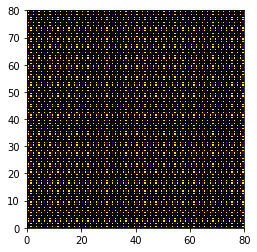

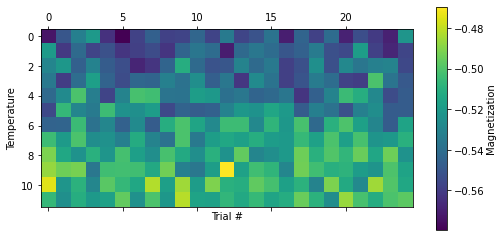

[-0.552075 -0.54855  -0.541225 -0.541025 -0.5314   -0.532725 -0.52235
 -0.5165   -0.5112   -0.508175 -0.505925 -0.50835 ]


<function matplotlib.pyplot.show>

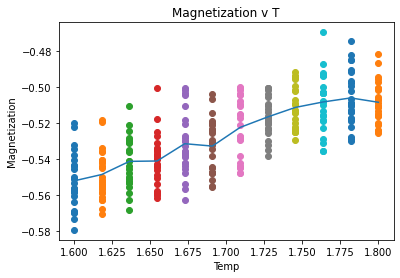

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import itertools
import time
start_time = time.time()


def GenerateHexLattice(N):
    #config = (2*rd(0,2,(N,N)))-1
    config = (2*rd(0,1,(N,N)))-1
    k = 0
    while k <N:
        i = 0
        j = 2
        while j < N:
            config [j][k] = 0
            config [j+1][k] = 0 
            j = j + 4
        while i < N:    
            config [i][k+1] = 0
            config [i+1][k+1] = 0
            i = i + 4
        k = k+2
    return config            

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]
    if s == 0:
        return 0   
    elif Lattice [(a+1)%N,b] == 0:
        if Lattice [(a-1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    else:
        if Lattice [(a+1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    return  s

def graph (df):
    plt.pcolormesh(df, edgecolors='k', linewidth=0.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    return 0

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag

myTval = np.linspace(1.6,1.8,12)
 
N=80
N_loops = 25
config = GenerateHexLattice(N)
sites = np.count_nonzero(config)
print (sites)
bank = np.zeros((len(myTval),N_loops))
graph(config)



for i in range (len(myTval)):
    tempo_mag = np.zeros(N_loops, dtype=float)
    config = GenerateHexLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo_mag [m] = MagCalc(config)/(sites)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo_mag


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.show


3200
--- 17.498554706573486 seconds ---
--- 33.62315225601196 seconds ---
--- 49.45823812484741 seconds ---
--- 64.86141920089722 seconds ---


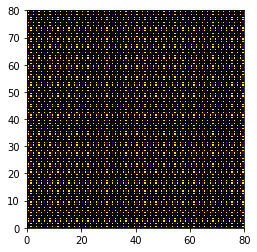

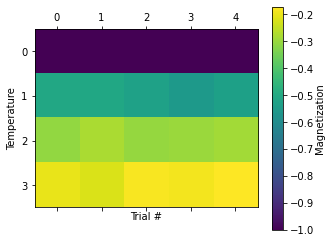

[-1.       -0.524625 -0.294    -0.191875]


<function matplotlib.pyplot.show>

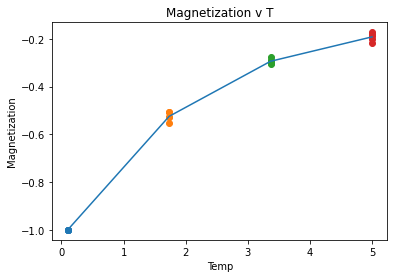

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import itertools
import time
start_time = time.time()


def GenerateHexLattice(N):
    #config = (2*rd(0,2,(N,N)))-1
    config = (2*rd(0,1,(N,N)))-1
    k = 0
    while k <N:
        i = 0
        j = 2
        while j < N:
            config [j][k] = 0
            config [j+1][k] = 0 
            j = j + 4
        while i < N:    
            config [i][k+1] = 0
            config [i+1][k+1] = 0
            i = i + 4
        k = k+2
    return config            

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]
    if s == 0:
        return 0   
    elif Lattice [(a+1)%N,b] == 0:
        if Lattice [(a-1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    else:
        if Lattice [(a+1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    return  s

def graph (df):
    plt.pcolormesh(df, edgecolors='k', linewidth=0.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    return 0

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag

myTval = np.linspace(0.1,5,4)
 
N=80
N_loops = 5
config = GenerateHexLattice(N)
sites = np.count_nonzero(config)
print (sites)
bank = np.zeros((len(myTval),N_loops))
graph(config)



for i in range (len(myTval)):
    tempo_mag = np.zeros(N_loops, dtype=float)
    config = GenerateHexLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo_mag [m] = MagCalc(config)/(sites)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo_mag


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.show


3200
--- 31.974854469299316 seconds ---
--- 62.08150792121887 seconds ---
--- 91.74656248092651 seconds ---
--- 122.02269148826599 seconds ---
--- 151.7055914402008 seconds ---
--- 185.48283791542053 seconds ---


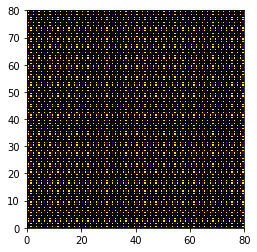

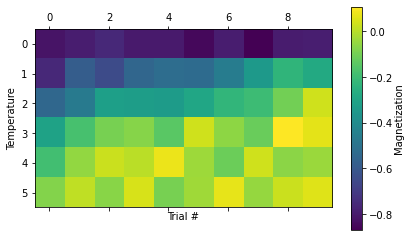

[-0.80525   -0.487625  -0.2761875 -0.074125  -0.032625  -0.008125 ]


<function matplotlib.pyplot.show>

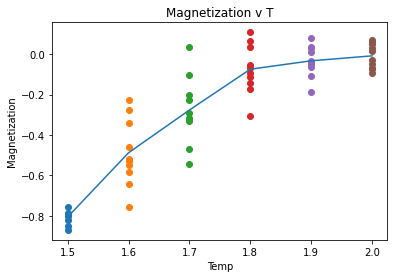

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import itertools
import time
start_time = time.time()


def GenerateHexLattice(N):
    #config = (2*rd(0,2,(N,N)))-1
    config = (2*rd(0,1,(N,N)))-1
    k = 0
    while k <N:
        i = 0
        j = 2
        while j < N:
            config [j][k] = 0
            config [j+1][k] = 0 
            j = j + 4
        while i < N:    
            config [i][k+1] = 0
            config [i+1][k+1] = 0
            i = i + 4
        k = k+2
    return config            

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]
    if s == 0:
        return 0   
    elif Lattice [(a+1)%N,b] == 0:
        if Lattice [(a-1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    else:
        if Lattice [(a+1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    return  intrxE 

def graph (df):
    plt.pcolormesh(df, edgecolors='k', linewidth=0.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    return 0

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag

myTval = np.linspace(1.5,2,6)
 
N=80
N_loops = 10
config = GenerateHexLattice(N)
sites = np.count_nonzero(config)
print (sites)
bank = np.zeros((len(myTval),N_loops))
graph(config)



for i in range (len(myTval)):
    tempo_mag = np.zeros(N_loops, dtype=float)
    config = GenerateHexLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo_mag [m] = MagCalc(config)/(sites)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo_mag


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.show


3200
--- 30.75845766067505 seconds ---
--- 60.987234115600586 seconds ---
--- 91.68419075012207 seconds ---
--- 123.89284038543701 seconds ---
--- 154.07695651054382 seconds ---
--- 184.64296555519104 seconds ---
--- 214.84921264648438 seconds ---
--- 245.03301525115967 seconds ---
--- 275.5856554508209 seconds ---
--- 305.78447437286377 seconds ---
--- 335.9948093891144 seconds ---
--- 366.4577405452728 seconds ---
--- 396.57370829582214 seconds ---
--- 427.5394854545593 seconds ---
--- 458.45121908187866 seconds ---
--- 488.7835605144501 seconds ---
--- 519.4841845035553 seconds ---
--- 554.3874061107635 seconds ---
--- 584.2978165149689 seconds ---
--- 614.1070454120636 seconds ---
--- 643.7096269130707 seconds ---
--- 673.5092115402222 seconds ---
--- 703.113997220993 seconds ---
--- 732.9599986076355 seconds ---
--- 764.4106879234314 seconds ---


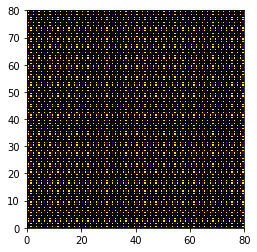

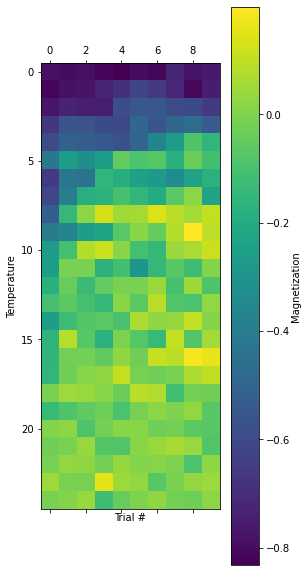

[-0.787875  -0.7339375 -0.6529375 -0.553875  -0.41      -0.179
 -0.313     -0.209     -0.001     -0.096375  -0.0190625 -0.118125
 -0.0523125 -0.052     -0.0380625 -0.04525    0.02925    0.009375
  0.0068125 -0.0429375 -0.0219375 -0.0076875  0.0009375  0.025875
 -0.013125 ]


<function matplotlib.pyplot.show>

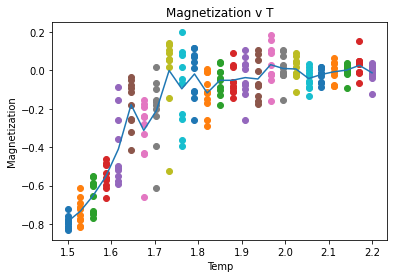

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import itertools
import time
start_time = time.time()


def GenerateHexLattice(N):
    #config = (2*rd(0,2,(N,N)))-1
    config = (2*rd(0,1,(N,N)))-1
    k = 0
    while k <N:
        i = 0
        j = 2
        while j < N:
            config [j][k] = 0
            config [j+1][k] = 0 
            j = j + 4
        while i < N:    
            config [i][k+1] = 0
            config [i+1][k+1] = 0
            i = i + 4
        k = k+2
    return config            

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]
    if s == 0:
        return 0   
    elif Lattice [(a+1)%N,b] == 0:
        if Lattice [(a-1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    else:
        if Lattice [(a+1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    return  intrxE 

def graph (df):
    plt.pcolormesh(df, edgecolors='k', linewidth=0.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    return 0

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag

myTval = np.linspace(1.5,2.2,25)
 
N=80
N_loops = 10
config = GenerateHexLattice(N)
sites = np.count_nonzero(config)
print (sites)
bank = np.zeros((len(myTval),N_loops))
graph(config)



for i in range (len(myTval)):
    tempo_mag = np.zeros(N_loops, dtype=float)
    config = GenerateHexLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo_mag [m] = MagCalc(config)/(sites)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo_mag


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.show


3200
--- 31.599170207977295 seconds ---
--- 62.95544743537903 seconds ---
--- 93.93546485900879 seconds ---
--- 125.16455149650574 seconds ---
--- 156.79159545898438 seconds ---
--- 188.82047581672668 seconds ---
--- 220.9188506603241 seconds ---
--- 252.44567942619324 seconds ---
--- 283.5250253677368 seconds ---
--- 314.79916167259216 seconds ---
--- 346.3411407470703 seconds ---
--- 377.70103931427 seconds ---
--- 409.0454955101013 seconds ---
--- 440.4053838253021 seconds ---
--- 471.9673056602478 seconds ---
--- 502.88365387916565 seconds ---
--- 534.1041076183319 seconds ---
--- 564.8866038322449 seconds ---
--- 595.4499461650848 seconds ---
--- 625.996574640274 seconds ---
--- 656.5112612247467 seconds ---
--- 687.0090498924255 seconds ---
--- 717.3744435310364 seconds ---
--- 747.5430722236633 seconds ---
--- 777.8021516799927 seconds ---


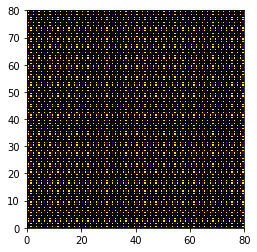

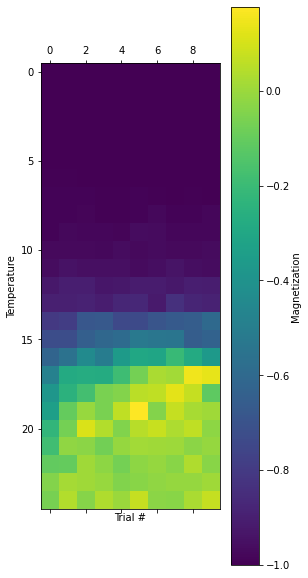

[-1.        -1.        -0.9996875 -0.9990625 -0.9991875 -0.998375
 -0.996625  -0.992375  -0.9866875 -0.977625  -0.9686875 -0.953875
 -0.9128125 -0.8845    -0.70225   -0.6166875 -0.394     -0.123
 -0.069     -0.0195     0.0025625 -0.03125   -0.0346875 -0.0120625
  0.01025  ]


<function matplotlib.pyplot.show>

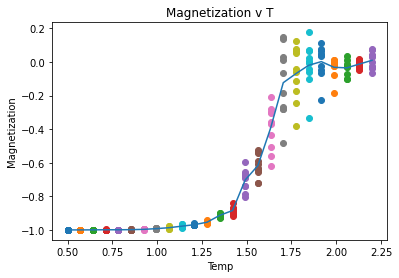

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import itertools
import time
start_time = time.time()


def GenerateHexLattice(N):
    #config = (2*rd(0,2,(N,N)))-1
    config = (2*rd(0,1,(N,N)))-1
    k = 0
    while k <N:
        i = 0
        j = 2
        while j < N:
            config [j][k] = 0
            config [j+1][k] = 0 
            j = j + 4
        while i < N:    
            config [i][k+1] = 0
            config [i+1][k+1] = 0
            i = i + 4
        k = k+2
    return config            

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]
    if s == 0:
        return 0   
    elif Lattice [(a+1)%N,b] == 0:
        if Lattice [(a-1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    else:
        if Lattice [(a+1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    return  intrxE 

def graph (df):
    plt.pcolormesh(df, edgecolors='k', linewidth=0.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    return 0

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag

myTval = np.linspace(0.5,2.2,25)
 
N=80
N_loops = 10
config = GenerateHexLattice(N)
sites = np.count_nonzero(config)
print (sites)
bank = np.zeros((len(myTval),N_loops))
graph(config)



for i in range (len(myTval)):
    tempo_mag = np.zeros(N_loops, dtype=float)
    config = GenerateHexLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo_mag [m] = MagCalc(config)/(sites)
    #plt.matshow(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo_mag


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.show


3200


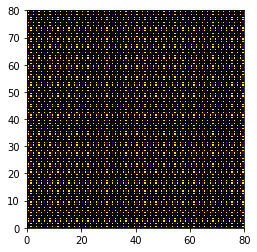

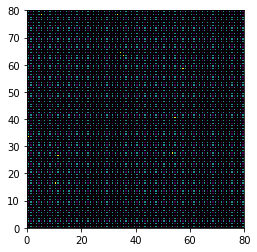

--- 29.48919677734375 seconds ---


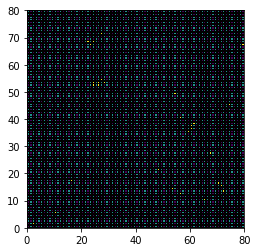

--- 60.12837100028992 seconds ---


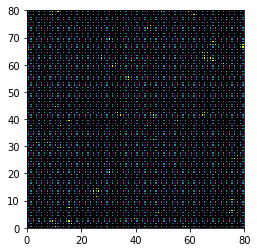

--- 89.41228795051575 seconds ---


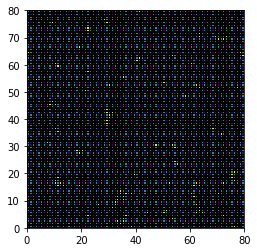

--- 119.39625978469849 seconds ---


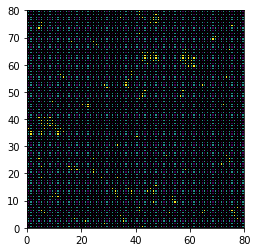

--- 149.7181534767151 seconds ---


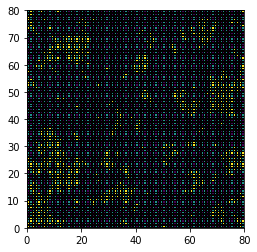

--- 179.63913750648499 seconds ---


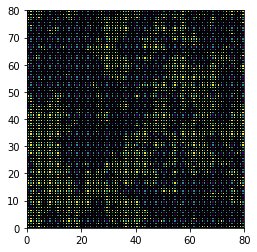

--- 209.04954314231873 seconds ---


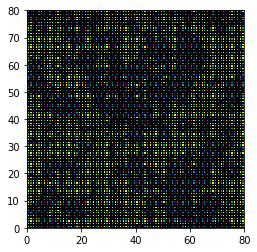

--- 238.73520374298096 seconds ---


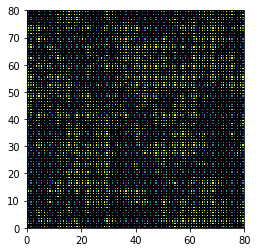

--- 269.0618770122528 seconds ---


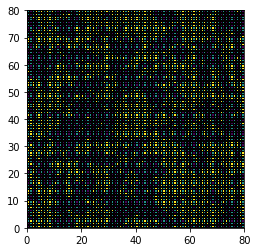

--- 298.3875341415405 seconds ---


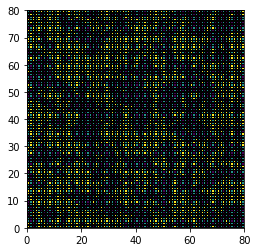

--- 327.18717885017395 seconds ---


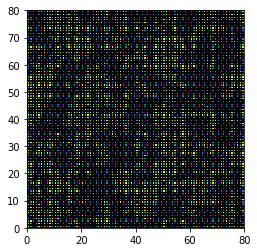

--- 356.21249294281006 seconds ---


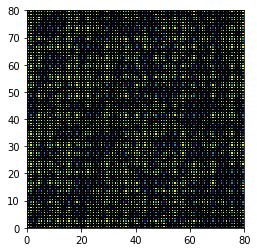

--- 386.3188123703003 seconds ---


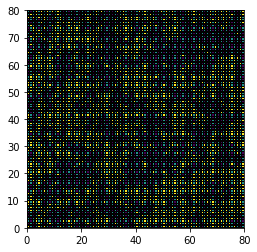

--- 415.0786101818085 seconds ---


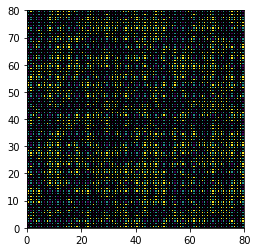

--- 444.0949249267578 seconds ---


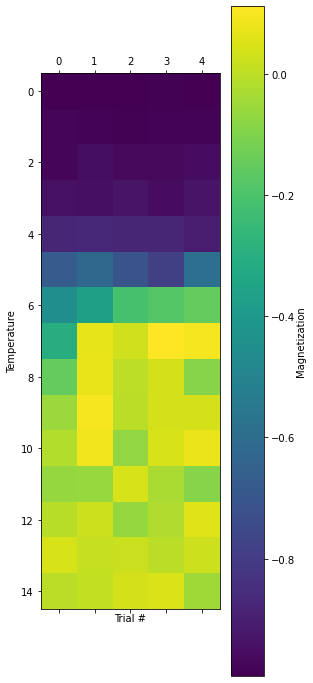

[-9.91875e-01 -9.82375e-01 -9.63250e-01 -9.44000e-01 -8.79875e-01
 -6.74875e-01 -2.69000e-01  2.25000e-03 -2.46250e-02  2.43750e-02
  2.68750e-02 -3.81250e-02 -5.00000e-04  2.20000e-02  1.10000e-02]


<function matplotlib.pyplot.show>

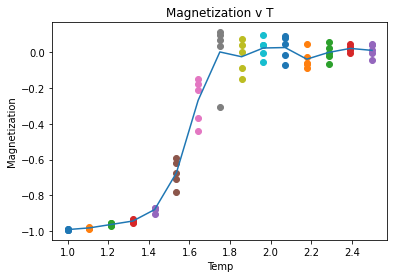

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint as rd
from numpy.random import rand
import itertools
import time
start_time = time.time()


def GenerateHexLattice(N):
    #config = (2*rd(0,2,(N,N)))-1
    config = (2*rd(0,1,(N,N)))-1
    k = 0
    while k <N:
        i = 0
        j = 2
        while j < N:
            config [j][k] = 0
            config [j+1][k] = 0 
            j = j + 4
        while i < N:    
            config [i][k+1] = 0
            config [i+1][k+1] = 0
            i = i + 4
        k = k+2
    return config            

def intrxEcalc (Lattice, a, b):
    intrxE = 0 # E = -1 if aligned, +1 if not aligned
    s = Lattice [a,b]
    if s == 0:
        return 0   
    elif Lattice [(a+1)%N,b] == 0:
        if Lattice [(a-1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a+1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    else:
        if Lattice [(a+1)%N,b] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b+1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
        if Lattice [(a-1)%N,(b-1)%N] == s:
            intrxE += -1
        else:
            intrxE += 1
    return  intrxE 

def graph (df):
    plt.pcolormesh(df, edgecolors='k', linewidth=0.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.show()
    return 0

def MetropolisMonteCarlo (Lattice, T):
    for j in range (512):
        for i in range (512):
            a = rd (0,N)
            b = rd (0,N)
            while (Lattice [a,b] == 0):
              a = rd (0,N)
              b = rd (0,N) 
            intrxE0 = intrxEcalc (Lattice, a, b)
            Lattice[a,b] *= -1
            intrxE1 = intrxEcalc (Lattice, a, b)
            if (intrxE1-intrxE0) > 0 and rand() > np.exp(-(intrxE1-intrxE0)/T):
                Lattice[a,b] *=-1
    return Lattice

def MagCalc (Lattice):
    mag = np.sum (Lattice)
    return mag

myTval = np.linspace(1,2.5,15)
 
N=80
N_loops = 5
config = GenerateHexLattice(N)
sites = np.count_nonzero(config)
print (sites)
bank = np.zeros((len(myTval),N_loops))
graph(config)



for i in range (len(myTval)):
    tempo_mag = np.zeros(N_loops, dtype=float)
    config = GenerateHexLattice(N)
    for m in range (N_loops):
        MetropolisMonteCarlo (config, myTval[i])
        #print("--- %s T ---" % (myTval[i]))
        #print("--- %s M ---" % (MagCalc(config)/(N*N)))
        tempo_mag [m] = MagCalc(config)/(sites)
    graph(config)
    #plt.show()
    print("--- %s seconds ---" % (time.time() - start_time))
    bank [i] = tempo_mag


plt.matshow(bank)
plt.xlabel("Trial #")
plt.ylabel("Temperature")
cbar= plt.colorbar()
cbar.set_label("Magnetization", labelpad=+1)
plt.show()

#post processing

bank_avg = np.zeros(len(myTval))
for i in range (len(myTval)):
    bank_avg[i] = np.average(bank[i,:])
print (bank_avg)

for i in range (len(myTval)):
    temp = np.full(N_loops,myTval[i])
    plt.scatter(temp, bank[i])
plt.plot (myTval,bank_avg)
plt.title ("Magnetization v T")
plt.xlabel("Temp")
plt.ylabel("Magnetization")
plt.show
